In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [2]:
def prepare_data(df,forecast_col,forecast_out,test_size):
    label = df[forecast_col].shift(-forecast_out) #creating new column called label with the last 5 rows are nan
    X = np.array(df[[forecast_col]]) #creating the feature array
    X = preprocessing.scale(X) #processing the feature array
    X_lately = X[-forecast_out:] #creating the column i want to use later in the predicting method
    X = X[:-forecast_out] # X that will contain the training and testing
    label.dropna(inplace=True) #dropping na values
    y = np.array(label)  # assigning Y
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=test_size, random_state=0) #cross validation

    response = [X_train,X_test , Y_train, Y_test , X_lately]
    return response

In [10]:
df = pd.read_csv("OKOMU PRICE CHART real.csv")
df.head()

,Date,Close
0,10/3/2023,183.5
1,9/3/2023,183.5
2,8/3/2023,183.5
3,7/3/2023,183.5
4,6/3/2023,183.5


In [25]:
forecast_col = 'Close'
forecast_out = 100
test_size = 0.1

In [18]:
X_train, X_test, Y_train, Y_test , X_lately =prepare_data(df,forecast_col,forecast_out,test_size); #calling the method were the cross validation and data preperation is in
learner = LinearRegression() #initializing linear regression model

learner.fit(X_train,Y_train)

LinearRegression()

In [26]:
score=learner.score(X_test,Y_test)#testing the linear regression model
forecast= learner.predict(X_lately) #set that will contain the forecasted data
response={}#creting json object
response['test_score']=score
response['forecast_set']=forecast

print(response)

{'test_score': 0.5120919005380238, 'forecast_set': array([185.19391304, 185.19391304, 185.19391304, 185.19391304,
       185.19391304, 185.19391304, 185.19391304, 185.19391304,
       290.47391304, 290.47391304, 290.47391304, 290.47391304,
       290.47391304, 290.47391304, 290.47391304, 290.47391304,
       290.47391304, 290.47391304, 290.47391304, 290.47391304,
       290.47391304, 290.47391304, 290.47391304, 290.47391304,
       290.47391304, 290.47391304, 290.47391304, 290.47391304,
       290.47391304, 274.12608696, 274.12608696, 274.12608696,
       274.12608696, 274.12608696, 274.12608696, 274.12608696,
       274.12608696, 274.12608696, 274.12608696, 274.12608696,
       274.12608696, 274.12608696, 274.12608696, 274.12608696,
       274.12608696, 274.12608696, 274.12608696, 274.12608696,
       274.12608696, 274.12608696, 274.12608696, 274.12608696,
       274.12608696, 274.12608696, 274.12608696, 261.04782609,
       261.04782609, 261.04782609, 261.04782609, 261.04782609,
    

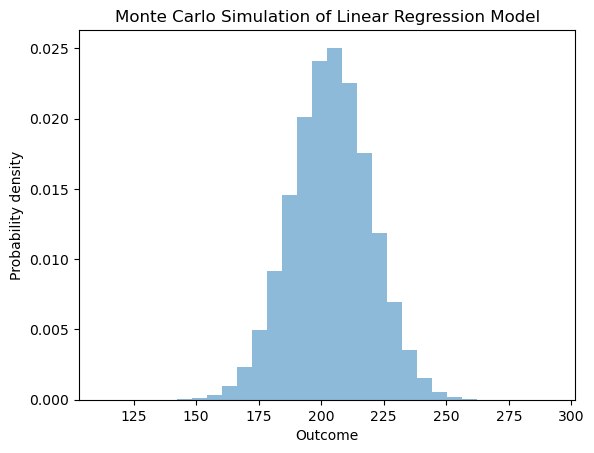

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a large number of random input features
num_samples = 100000000
num_features = len(X_lately[0])
X_mc = np.random.rand(num_samples, num_features)

# Use the trained linear regression model to generate predicted output labels
forecast_mc = learner.predict(X_mc)

# Generate a probability distribution of the predicted output labels
mu = np.mean(forecast_mc)
sigma = np.std(forecast_mc)

# Sample from the probability distribution to generate a large number of possible outcomes
outcomes = np.random.normal(mu, sigma, num_samples)

# Analyze the distribution of the outcomes
mean_outcomes = np.mean(outcomes)
std_outcomes = np.std(outcomes)
skew_outcomes = np.mean((outcomes - mean_outcomes)**3) / std_outcomes**3
kurt_outcomes = np.mean((outcomes - mean_outcomes)**4) / std_outcomes**4 - 3.0

plt.hist(outcomes, bins=30, density=True, alpha=0.5)
plt.xlabel('Outcome')
plt.ylabel('Probability density')
plt.title('Monte Carlo Simulation of Linear Regression Model')
plt.show()